In [6]:
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(VennDiagram)

In [8]:
#GR-meQTLs
meqtls = data.table::fread("../Tables/S2_GRmeQTLs.txt", data.table = F)
dim(meqtls)
#GR-meQTLs without blood cell count adjustment
noBCC.meqtls=data.table::fread("data/GRmeQTLs_noBCC.txt", data.table = F)
dim(noBCC.meqtls)

[1] 104828     12

[1] 102051      7

## Panel A - Bar Plot (ChromHMM- meCpGs)

,annot.code,CpG_ID,annot.type,ORDER,GROUP,Epigenome.Mnemonic,Standardized.Epigenome.name
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
124184,E033,cg04370517,2_TssAFlnk,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
124185,E033,cg08295800,7_Enh,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
124186,E033,cg03429223,15_Quies,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
124187,E033,cg21442825,13_ReprPC,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
124188,E033,cg13888192,4_Tx,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
124189,E033,cg08757828,1_TssA,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood


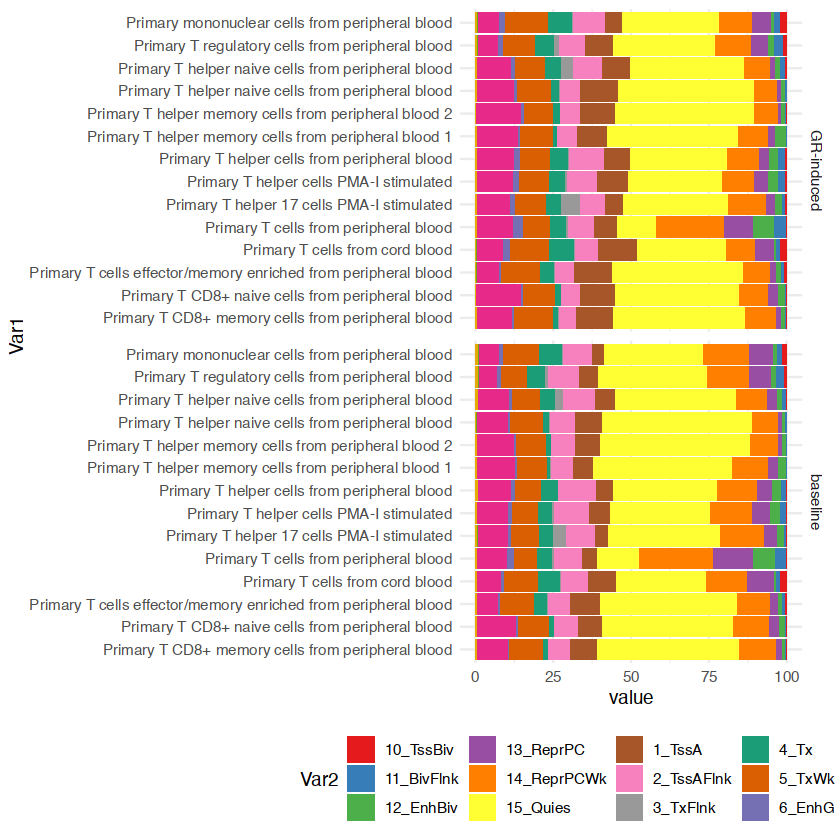

In [7]:
meqtl.chromhmm = readRDS("data/meQTLs_cpg_chromHmm_annotated.rds")
head(meqtl.chromhmm )
meqtl.plot.data = as.data.frame(apply(table(meqtl.chromhmm $annot.type, 
                                            meqtl.chromhmm $Standardized.Epigenome.name),
                                            2,function(x)x*100/sum(x)))
meqtl.plot.data.melt=(melt(t(meqtl.plot.data)))
meqtl.plot.data.melt$Pheno="GR-induced"

base.meqtl.chromhmm = readRDS("data/base_meQTLs_cpg_chromHmm_annotated.rds")
#head(base.meqtl.chromhmm )
base.meqtl.plot.data = as.data.frame(apply(table(base.meqtl.chromhmm $annot.type, 
                                            base.meqtl.chromhmm $Standardized.Epigenome.name),
                                            2,function(x)x*100/sum(x)))
base.meqtl.plot.data.melt=(melt(t(base.meqtl.plot.data)))
base.meqtl.plot.data.melt$Pheno="baseline"
             
chromHMM.cpg = rbind(base.meqtl.plot.data.melt, meqtl.plot.data.melt)

mycolors <- c(brewer.pal(n = 9, "Set1"), brewer.pal(n = 6, "Dark2"))

ggplot(data= chromHMM.cpg, aes(Var1,  value, fill=Var2 ))+geom_bar(stat = 'identity')  + coord_flip()+
  scale_fill_manual(values = mycolors)+ facet_grid(Pheno~.)+ 
  theme_minimal() + theme(legend.position="bottom")

## Panel B - Bar Plot (ChromHMM- meSNPs)

In [17]:
meqtl.snp.chromhmm = readRDS("data/meQTLs_snp_chromHmm_annotated.rds")
head(meqtl.snp.chromhmm )
meqtl.plot.data = as.data.frame(apply(table(meqtl.snp.chromhmm$annot.type, 
                                            meqtl.snp.chromhmm$Standardized.Epigenome.name),
                                            2,function(x)x*100/sum(x)))
meqtl.plot.data.melt=(melt(t(meqtl.plot.data)))
meqtl.plot.data.melt$Pheno="GR-induced"

,annot.code,CpG_ID,annot.type,ORDER,GROUP,Epigenome.Mnemonic,Standardized.Epigenome.name
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
2834671,E033,rs2686087,15_Quies,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
2834672,E033,rs9643672,5_TxWk,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
2834673,E033,rs8135325,7_Enh,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
2834674,E033,rs11600971,15_Quies,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
2834675,E033,rs34726252,4_Tx,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood
2834676,E033,rs10198260,15_Quies,27,Blood & T-cell,BLD.CD3.CPC,Primary T cells from cord blood


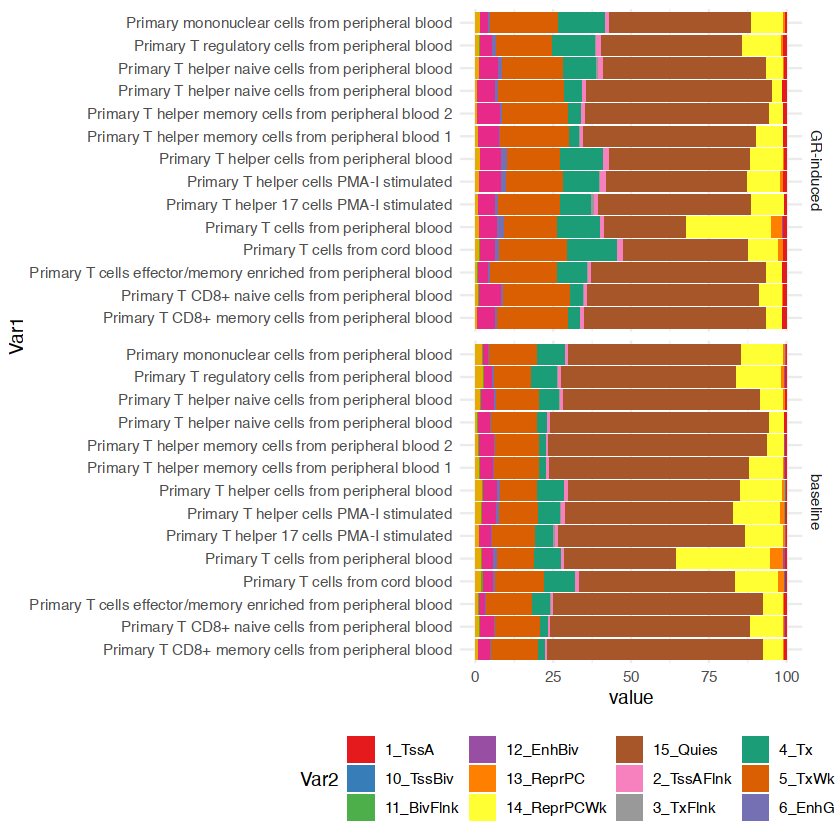

In [28]:
#base.meqtl.snp.chromhmm = readRDS("data/base_meQTLs_snp_chromHmm_annotated.rds")
#base.meqtl.plot.data = as.data.frame(apply(table(base.meqtl.snp.chromhmm$annot.type, 
#                                           base.meqtl.snp.chromhmm$Standardized.Epigenome.name),
#                                           2,function(x)x*100/sum(x)))
#files to large
base.meqtl.plot.data = read.delim("data/base.meqtl.plot.data.txt")
base.meqtl.plot.data = base.meqtl.plot.data[,sort(colnames(base.meqtl.plot.data))]
meqtl.plot.data = meqtl.plot.data[,sort(colnames(meqtl.plot.data))]
colnames(base.meqtl.plot.data) = colnames(meqtl.plot.data)
base.meqtl.plot.data.melt=(melt(t(base.meqtl.plot.data)))
base.meqtl.plot.data.melt$Pheno="baseline"

chromHMM.snp = rbind(base.meqtl.plot.data.melt, meqtl.plot.data.melt)


mycolors <- c(brewer.pal(n = 9, "Set1"), brewer.pal(n = 6, "Dark2"))

ggplot(data= chromHMM.snp, aes(Var1,  value, fill=Var2 ))+geom_bar(stat = 'identity')  + coord_flip()+
  scale_fill_manual(values = mycolors)+ facet_grid(Pheno~.)+ 
  theme_minimal() + theme(legend.position="bottom")

## Panel C - Venn diagram

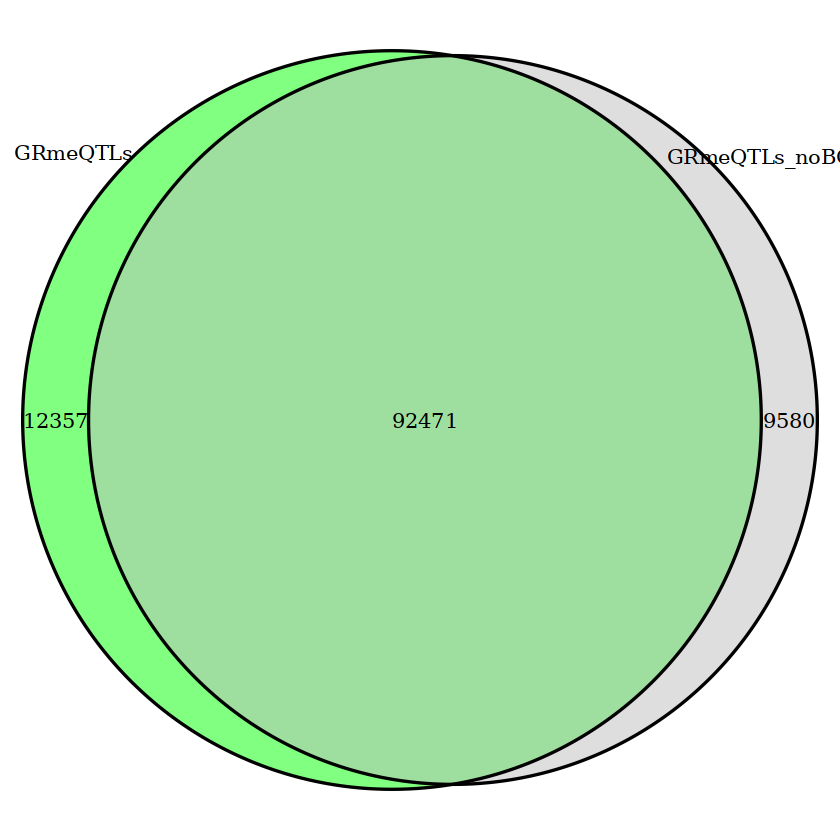

In [29]:
set_colors <- c("green", "gray")
# Create list of unique values
sets <- list(GRmeQTLs = meqtls$id, GRmeQTLs_noBCC = noBCC.meqtls$id)
venn_bcc=venn.diagram(sets, filename = NULL,scaled = TRUE, scaling.area = TRUE, fill = set_colors, alpha = 0.5, lwd = 2)
grid.newpage()
grid.draw(venn_bcc)


In [30]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggplot2_3.4.3       RColorBrewer_1.1-3  VennDiagram_1.7.3  
[4] futile.logger_1.4.3 reshape2_1.4.4     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.11          pillar_1.9.0         compiler_4.2.1      
 [4] formatR_1.14         plyr_1.8.8           base64enc_0.1-3     
 [7] futile.options_1.0.1 tools_4.2.1          digest_0.6.33       
[10] uuid_1.1-0           tibble_3.2.1         jsonlite_1.8.7      
[13] evaluate_0.21        lifecycle_1.0.3      gtable_0.3.4        
[16] pkgconfig_2.0.3      rlang_1.1